# Scrub Global Temperature File

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# File to Load
temp_data = "../Data/GlobalTemperatures.csv"

# Read Temperature Data
temp_data_df = pd.read_csv(temp_data)

temp_data_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Create a new dataset with only dt, LandAndOceanAverageTemperature, and LandAndOceanAverageTemperatureUncertainty
temp_data_df = temp_data_df[["dt", "LandAndOceanAverageTemperature", "LandAndOceanAverageTemperatureUncertainty"]]

# Drop rows with NaN
temp_data_df = temp_data_df.dropna()
temp_data_df

,dt,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,12.833,0.367
1201,1850-02-01,13.588,0.414
1202,1850-03-01,14.043,0.341
1203,1850-04-01,14.667,0.267
1204,1850-05-01,15.507,0.249
...,...,...,...
3187,2015-08-01,17.589,0.057
3188,2015-09-01,17.049,0.058
3189,2015-10-01,16.290,0.062
3190,2015-11-01,15.252,0.063


In [4]:
# Create a Year Column & Disable the SettingWithCopyWarning warning
pd.options.mode.chained_assignment = None

temp_data_df["Year"] = temp_data_df.dt.str[:4]
temp_data_df.head()

,dt,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
1200,1850-01-01,12.833,0.367,1850
1201,1850-02-01,13.588,0.414,1850
1202,1850-03-01,14.043,0.341,1850
1203,1850-04-01,14.667,0.267,1850
1204,1850-05-01,15.507,0.249,1850


In [5]:
# Group by Year and get average of both numerical columns
temp_data_df = temp_data_df.groupby("Year").mean().reset_index()

# Display DataFrame
temp_data_df.head()

,Year,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,14.867167,0.308167
1,1851,14.991833,0.312083
2,1852,15.006500,0.316417
3,1853,14.955167,0.283833
4,1854,14.991000,0.276417


In [6]:
# Convert Year column to int, then filter for Years 1990 on
temp_data_df["Year"] = temp_data_df["Year"].astype(str).astype(int)
target_years = temp_data_df["Year"] >= 1993
temp_data_df = temp_data_df[target_years]


# Save Data To CSV File
temp_data_df.to_csv(r"../Data/temp_data.csv", index = False, header=True)

# Display DataFrame
temp_data_df.head()

,Year,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
143,1993,15.466417,0.059167
144,1994,15.535000,0.058583
145,1995,15.637833,0.060417
146,1996,15.524667,0.059500
147,1997,15.713833,0.059167


In [7]:
# Convert Values Into Array
X = temp_data_df.iloc[:, 0].values.reshape(-1, 1)

# Calculate Dimension Of Rows
Y = temp_data_df.iloc[:, 1].values.reshape(-1, 1)

# Create Object For Class
linear_regressor = LinearRegression()

# Perform Linear Regression
linear_regressor.fit(X, Y)

# Make Predictions
Y_pred = linear_regressor.predict(X)

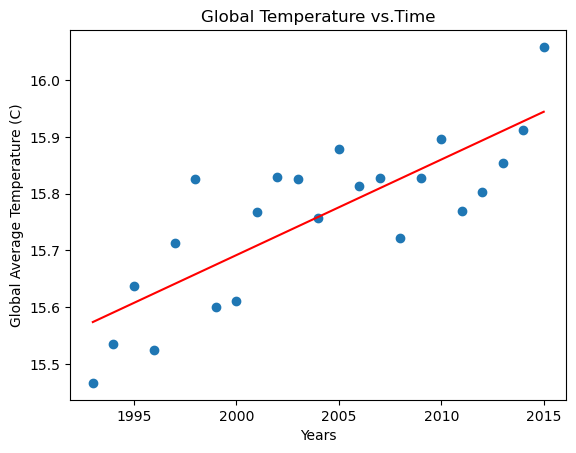

In [8]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "red")
plt.xlabel("Years")
plt.ylabel("Global Average Temperature (C)")
plt.title("Global Temperature vs.Time")
fig1 = plt.gcf()
fig1.savefig("../Images/TempToTimeScatter.png", bbox_inches = "tight")